In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("animal_disease_dataset.csv")

In [4]:
data.shape

(43778, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43778.0,6.769131,3.886739,1.0,4.0,7.0,10.0,15.0
Temperature,43778.0,102.269590,1.400872,100.0,101.1,102.2,103.4,105.0


<Axes: >

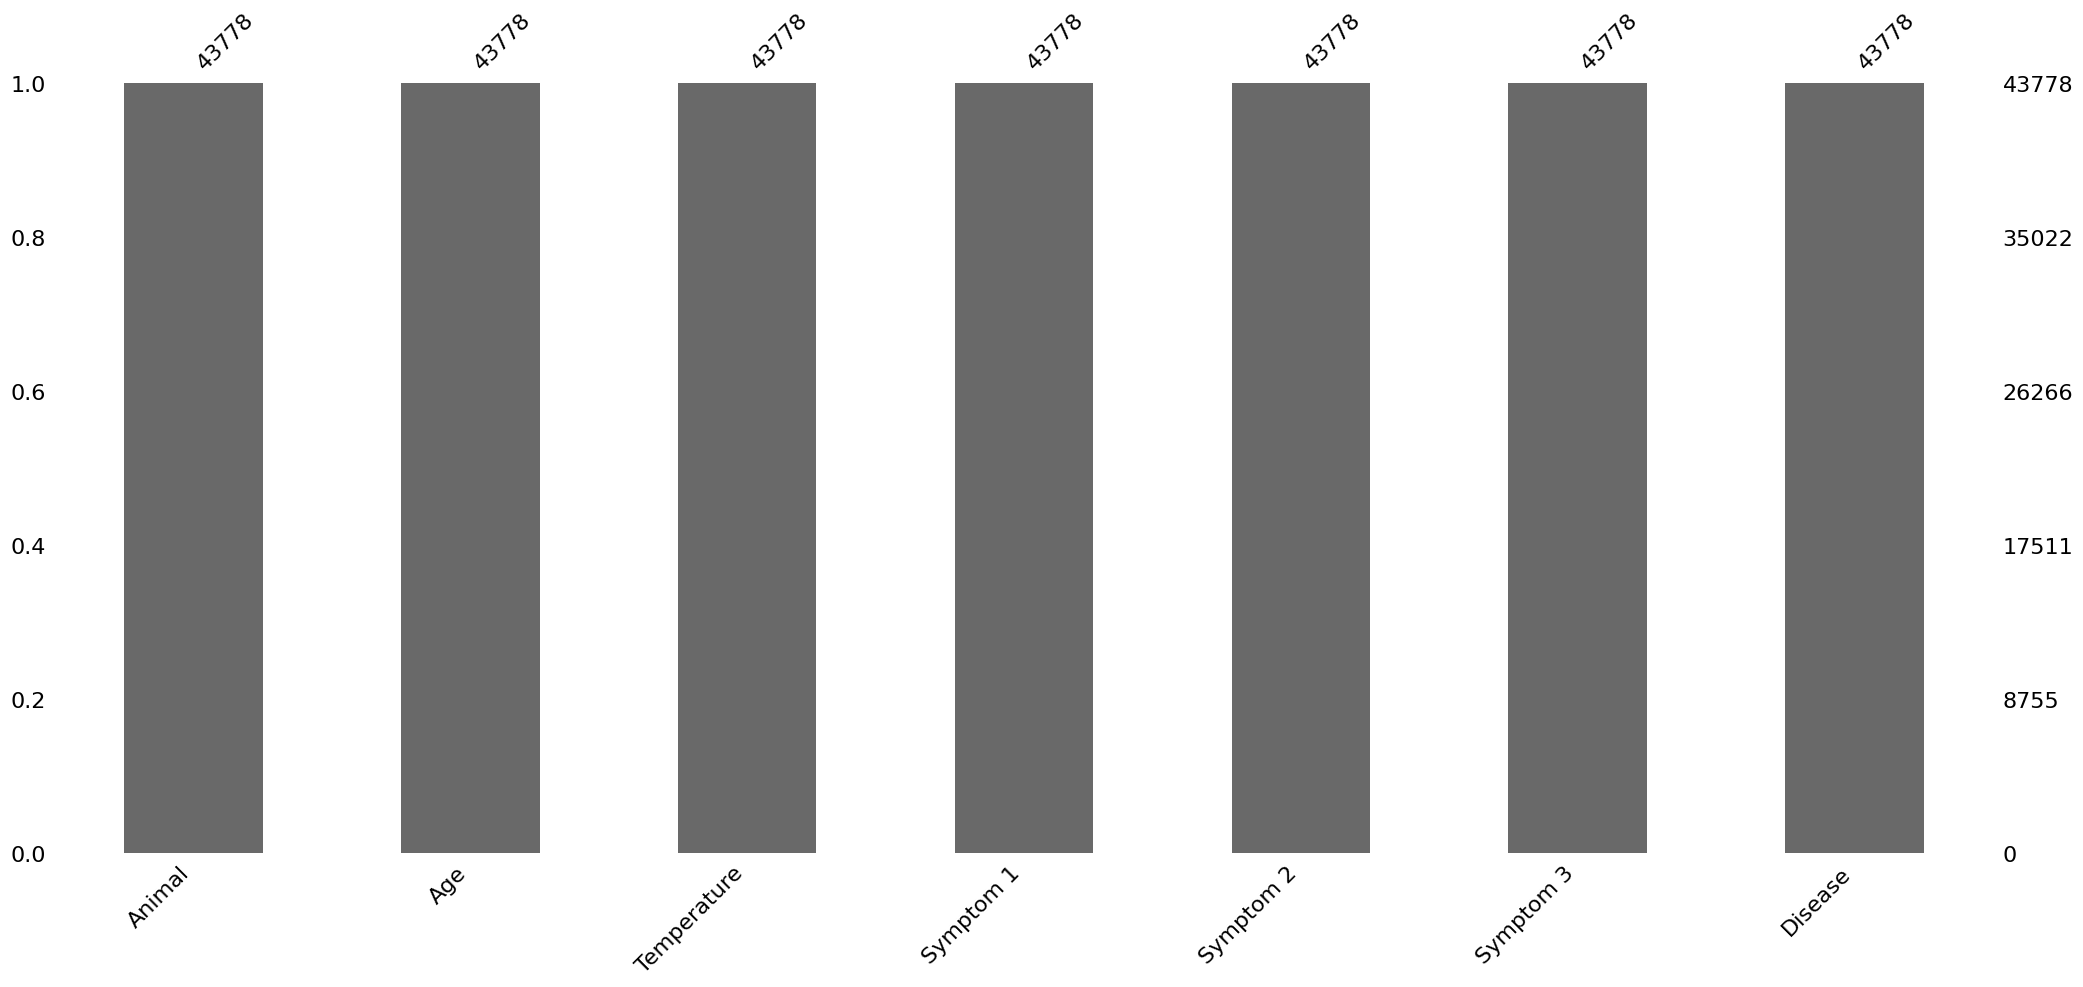

In [7]:
#Check for missing values
import missingno as msno
msno.bar(data)

In [8]:
#all animals
all_animals = data['Animal'].unique()
print(f'{all_animals} \n number of animals = {len(all_animals)}')

# Unique Diseases
all_disease = data['Disease'].unique()
print(f'{all_disease}\n number of diseases = {len(all_disease)}')

['cow' 'buffalo' 'sheep' 'goat'] 
 number of animals = 4
['pneumonia' 'lumpy virus' 'blackleg' 'foot and mouth' 'anthrax']
 number of diseases = 5


In [9]:
#Unique Symptoms
def unique_symptoms():
    symptom_features = ['Symptom 1','Symptom 2','Symptom 3']
    for i in symptom_features:
        symptoms = data[i].unique()
        print(f' {i} = {np.sort(symptoms)}\n\n Total = {len(symptoms)} \n')
    
        
unique_symptoms()

def are_symptoms_same():
    Symptop_1 = np.sort(data['Symptom 1'].unique())
    Symptop_2 = np.sort(data['Symptom 2'].unique())
    Symptop_3 = np.sort(data['Symptom 3'].unique())
    print("Are equal?")
    return np.array_equal(Symptop_1,Symptop_2) and np.array_equal(Symptop_1,Symptop_3)

are_symptoms_same()

 Symptom 1 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 2 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 3 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'bl

True

In [10]:
# Copy dataframe(dataset)
df = data.copy()
df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth


In [11]:
#Lable Encoding Diseases
def label_encode_columns(data,columns, output_file):
    lb_animals = LabelEncoder()
    lb_disease = LabelEncoder()
    for column in columns:
        if column == 'Animal':
            data[column] = lb_animals.fit_transform(data[column])
        elif column == 'Disease':
            data[column] = lb_disease.fit_transform(data[column])

    with open(output_file, 'w') as file:
        for label, disease_name in enumerate(lb_disease.classes_):
            file.write(f"{label}: '{disease_name}'\n")

        file.write("\n")
    return data

col_to_encode = ['Animal','Disease']
output_file = 'livestock_disease.txt'
df= label_encode_columns(df, col_to_encode, output_file)

df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,1,3,103.1,depression,painless lumps,loss of appetite,4
1,0,13,104.5,painless lumps,loss of appetite,depression,3
2,3,1,100.5,depression,painless lumps,loss of appetite,3
3,1,14,100.3,loss of appetite,swelling in limb,crackling sound,1
4,3,2,103.6,painless lumps,loss of appetite,depression,4
5,2,10,101.2,loss of appetite,blisters on gums,difficulty walking,2
6,3,6,103.3,loss of appetite,depression,painless lumps,3
7,2,6,101.7,difficulty walking,blisters on tongue,loss of appetite,2
8,0,9,102.5,depression,painless lumps,loss of appetite,3
9,2,3,102.7,lameness,blisters on mouth,loss of appetite,2


In [12]:
# Replace symptoms features with actual symptoms

new_features = ['blisters on gums', 'blisters on hooves', 'blisters on mouth',
                'blisters on tongue', 'chest discomfort', 'chills', 'crackling sound',
                'depression', 'difficulty walking', 'fatigue', 'lameness', 'loss of appetite',
                'painless lumps', 'shortness of breath', 'sores on gums', 'sores on hooves',
                'sores on mouth', 'sores on tongue', 'sweats', 'swelling in abdomen',
                'swelling in extremities', 'swelling in limb', 'swelling in muscle',
                'swelling in neck']
#create columns
for feature in new_features:
    df[feature] = 0

# Update the new columns 
for index, row in df.iterrows():
    for symptom_column in ['Symptom 1', 'Symptom 2', 'Symptom 3']:
        symptom = row[symptom_column]
        if symptom in new_features:
            df.loc[index, symptom] = 1
            
df.head(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease,blisters on gums,blisters on hooves,blisters on mouth,...,sores on gums,sores on hooves,sores on mouth,sores on tongue,sweats,swelling in abdomen,swelling in extremities,swelling in limb,swelling in muscle,swelling in neck
0,1,3,103.1,depression,painless lumps,loss of appetite,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,13,104.5,painless lumps,loss of appetite,depression,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,100.5,depression,painless lumps,loss of appetite,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,14,100.3,loss of appetite,swelling in limb,crackling sound,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2,103.6,painless lumps,loss of appetite,depression,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Remove redundant colums
df.drop(['Symptom 1','Symptom 2','Symptom 3'], axis=1, inplace=True)

#Make diseae the last column
cols = list(df.columns)
cols.remove('Disease')
cols.append('Disease')
df = df[cols]

In [14]:
#train test split
X = df.drop("Disease", axis=1)
Y = df['Disease']
X_test,X_train,y_test,y_train = train_test_split(X, Y, test_size=0.2, random_state=12)

In [15]:
#Random forest
RForest = RandomForestClassifier(n_estimators = 100)
RForest.fit(X_train, y_train)
y_pred = RForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 82.33110616184113


In [16]:
#XGBoster
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 82.54525726686083


In [17]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 83.33904402946719


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=12)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}")

Accuracy: 82.40820055964822


In [19]:
import joblib
joblib.dump(lr, 'livestock.pkl')
joblib.dump(LabelEncoder().fit(data['Disease']), 'livestock_label_encoder.pkl')

['livestock_label_encoder.pkl']